<a href="https://colab.research.google.com/github/grinaldo-oliveira/SibGrapi/blob/main/Comparando_T%C3%A9cnicas_com_Clusters_e_R%C3%B3tulos_Reais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd /content/drive/MyDrive/Doutorado/SibGrapi

/content/drive/MyDrive/Doutorado/SibGrapi


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_embbed(pickle_path: str) -> tuple:
    data = np.load(pickle_path, allow_pickle=True).tolist()
    file_refs = data['fnames']
    embeds    = data['embeddings']
    labels    = data['labels']
    classes   = data['classes']

    embeds = np.vstack(embeds)
    labels = np.vstack(labels)

    return file_refs, embeds, labels, classes

def plot_embed2d(data, labels):
    fig = plt.figure(constrained_layout=True)  # Apply constrained_layout to the figure
    ax = fig.add_subplot(111)  # Remove layout argument
    ax.scatter(data[:,0], data[:,1], c=labels)
    plt.show()

def plot_embed3d(data, labels):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], c=labels)
    plt.show()

In [17]:
def load_embbed(pickle_path: str) -> tuple:
    data = np.load(pickle_path, allow_pickle=True).tolist()
    file_refs = data['fnames']
    embeds    = data['embeddings']
    labels    = data['labels']
    classes   = data['classes']

    embeds = np.vstack(embeds)
    labels = np.hstack(labels)  # Changed line

    return file_refs, embeds, labels, classes

In [76]:
file_refs, embeddings, labels, classes = load_embbed("Data/terumo-data-jpeg/UNI.npy")
embeddings.shape, labels.shape

((7582, 1024), (7582,))

In [77]:
from sklearn.preprocessing import StandardScaler
embeddings = StandardScaler().fit_transform(embeddings)

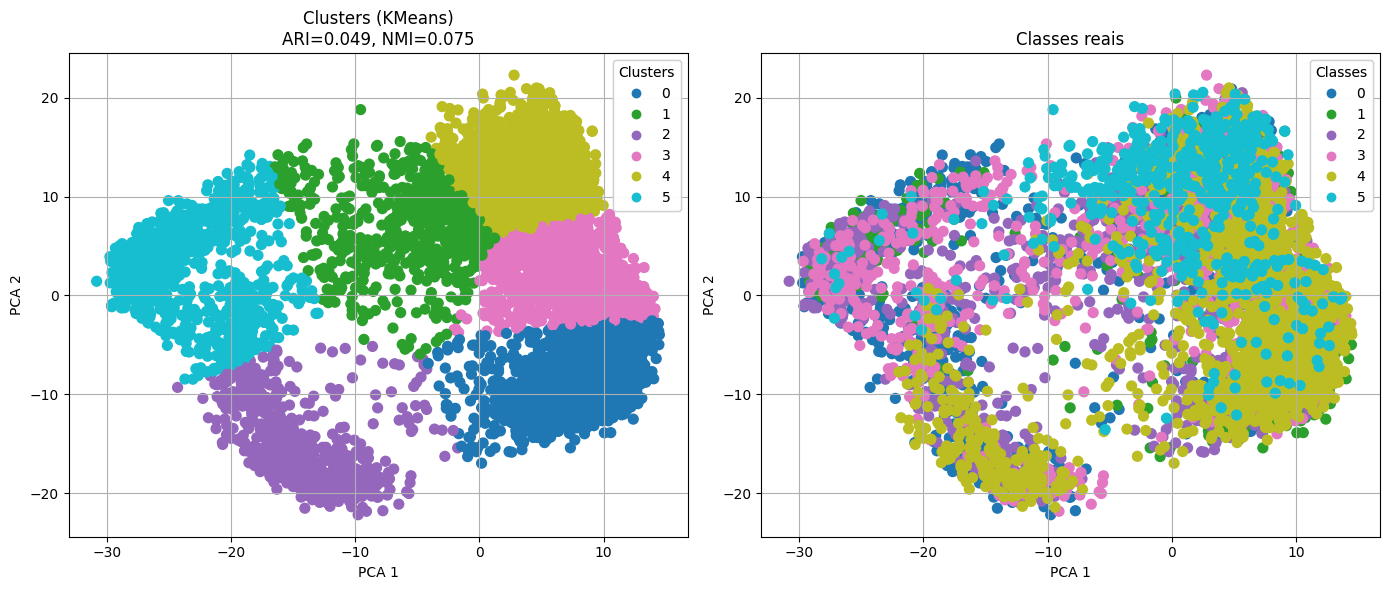

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import numpy as np

# embeddings: matriz (n_amostras, n_dimensoes)
# labels: vetor (n_amostras,) com os rótulos reais (0 a 5, por exemplo)

# Reduz para 2D com PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings)

# Clustering com KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(embeddings_pca)

# Métricas de avaliação
ari = adjusted_rand_score(labels, clusters)
nmi = normalized_mutual_info_score(labels, clusters)

# Plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Cluster Plot
scatter1 = axs[0].scatter(embeddings_pca[:, 0], embeddings_pca[:, 1],
                          c=clusters, cmap='tab10', s=50)
axs[0].set_title(f'Clusters (KMeans)\nARI={ari:.3f}, NMI={nmi:.3f}')
axs[0].set_xlabel('PCA 1')
axs[0].set_ylabel('PCA 2')
legend1 = axs[0].legend(*scatter1.legend_elements(), title="Clusters")
axs[0].add_artist(legend1)
axs[0].grid(True)

# Label Plot
scatter2 = axs[1].scatter(embeddings_pca[:, 0], embeddings_pca[:, 1],
                          c=labels, cmap='tab10', s=50)
axs[1].set_title('Classes reais')
axs[1].set_xlabel('PCA 1')
axs[1].set_ylabel('PCA 2')
legend2 = axs[1].legend(*scatter2.legend_elements(), title="Classes")
axs[1].add_artist(legend2)
axs[1].grid(True)

plt.tight_layout()
plt.show()

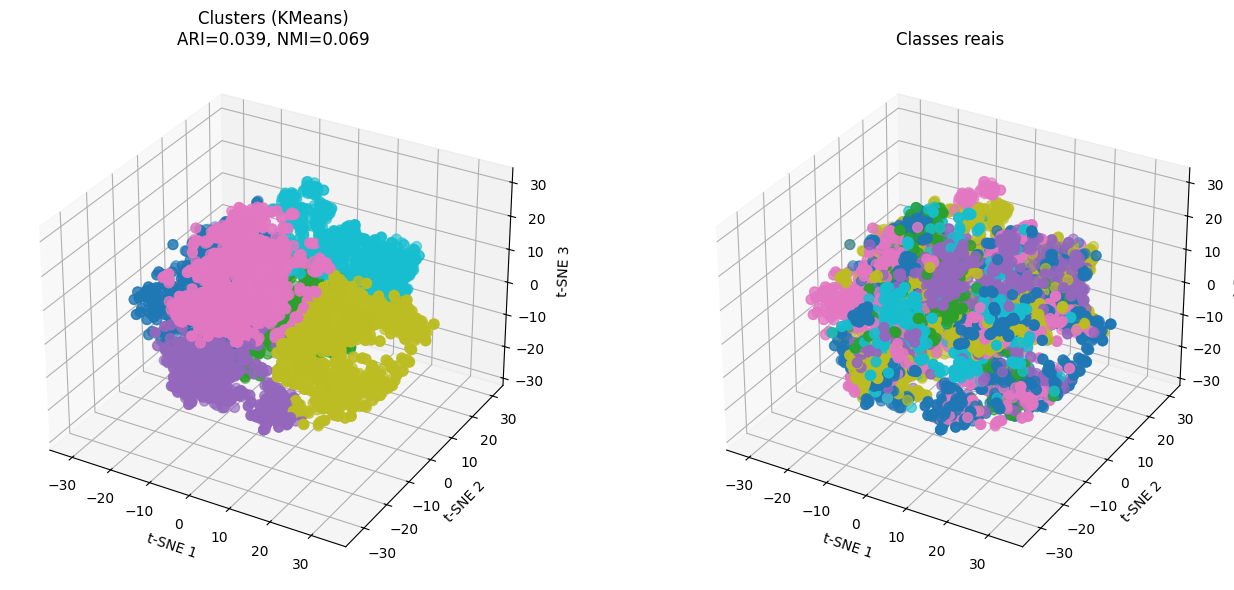

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from mpl_toolkits.mplot3d import Axes3D  # necessário para 3D

# embeddings: matriz (n_amostras, n_dimensoes)
# labels: vetor (n_amostras,) com os rótulos reais

# Reduz para 3D com t-SNE
tsne = TSNE(n_components=3, random_state=42, perplexity=30, learning_rate=200)
embeddings_tsne = tsne.fit_transform(embeddings)

# Clustering com KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(embeddings_tsne)

# Métricas de avaliação
ari = adjusted_rand_score(labels, clusters)
nmi = normalized_mutual_info_score(labels, clusters)

# Plot em 3D
fig = plt.figure(figsize=(14, 6))

# Gráfico 1: Clusters encontrados
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], embeddings_tsne[:, 2],
                       c=clusters, cmap='tab10', s=50)
ax1.set_title(f'Clusters (KMeans)\nARI={ari:.3f}, NMI={nmi:.3f}')
ax1.set_xlabel('t-SNE 1')
ax1.set_ylabel('t-SNE 2')
ax1.set_zlabel('t-SNE 3')

# Gráfico 2: Rótulos reais
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], embeddings_tsne[:, 2],
                       c=labels, cmap='tab10', s=50)
ax2.set_title('Classes reais')
ax2.set_xlabel('t-SNE 1')
ax2.set_ylabel('t-SNE 2')
ax2.set_zlabel('t-SNE 3')

plt.tight_layout()
plt.show()

In [28]:
pip install umap-learn


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


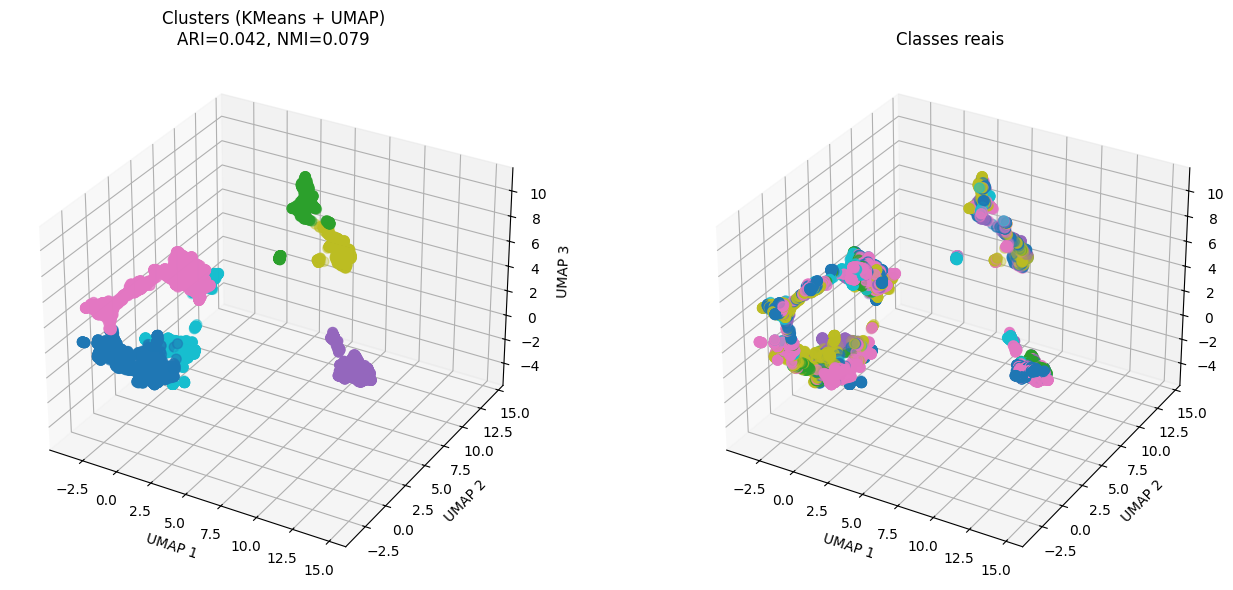

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import umap.umap_ as umap
from mpl_toolkits.mplot3d import Axes3D  # necessário para plot 3D

# embeddings: matriz (n_amostras, n_dimensoes)
# labels: vetor (n_amostras,) com os rótulos reais

# Redução com UMAP para 3D
reducer = umap.UMAP(n_components=3, random_state=42)
embeddings_umap = reducer.fit_transform(embeddings)

# Clustering com KMeans nos dados reduzidos
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(embeddings_umap)

# Métricas de comparação
ari = adjusted_rand_score(labels, clusters)
nmi = normalized_mutual_info_score(labels, clusters)

# Visualização 3D
fig = plt.figure(figsize=(14, 6))

# Gráfico 1: Clusters encontrados
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], embeddings_umap[:, 2],
                       c=clusters, cmap='tab10', s=50)
ax1.set_title(f'Clusters (KMeans + UMAP)\nARI={ari:.3f}, NMI={nmi:.3f}')
ax1.set_xlabel('UMAP 1')
ax1.set_ylabel('UMAP 2')
ax1.set_zlabel('UMAP 3')

# Gráfico 2: Rótulos reais
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], embeddings_umap[:, 2],
                       c=labels, cmap='tab10', s=50)
ax2.set_title('Classes reais')
ax2.set_xlabel('UMAP 1')
ax2.set_ylabel('UMAP 2')
ax2.set_zlabel('UMAP 3')

plt.tight_layout()
plt.show()


Adjusted Rand Index (ARI): 0.0610
Normalized Mutual Information (NMI): 0.1156


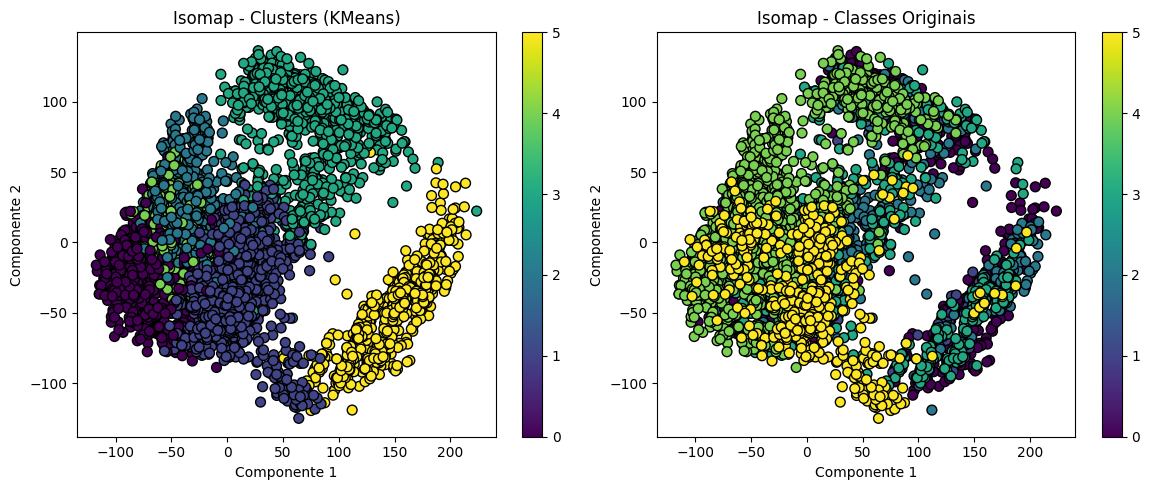

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# ----------------------------
# Simulação do embedding e rótulos originais
# ----------------------------
# Suponha que você já possua seus embeddings e os rótulos originais,
# por exemplo, carregados de um arquivo:
# embeddings = np.load("seus_embeddings.npy")
# labels_originais = np.load("seus_labels.npy")

# Simulação: criamos rótulos originais para 6 classes
labels_originais = labels

# ----------------------------
# Redução dimensional utilizando Isomap
# ----------------------------
n_neighbors = 15  # número de vizinhos para o Isomap, ajuste conforme necessário
n_components = 2  # reduzindo para 2 dimensões para visualização
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
embeddings_2d = isomap.fit_transform(embeddings)

# ----------------------------
# Clusterização utilizando KMeans com 6 clusters
# ----------------------------
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# ----------------------------
# Cálculo de métricas: ARI e NMI
# ----------------------------
ari = adjusted_rand_score(labels_originais, clusters)
nmi = normalized_mutual_info_score(labels_originais, clusters)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

# ----------------------------
# Plotagem dos Gráficos de Comparação
# ----------------------------
plt.figure(figsize=(12, 5))

# Gráfico 1: Embeddings após Isomap, coloridos com base nos clusters obtidos via KMeans
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=clusters,
    cmap="viridis",
    edgecolor="k",
    s=50
)
plt.title("Isomap - Clusters (KMeans)")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(scatter1, ticks=range(n_clusters))

# Gráfico 2: Embeddings após Isomap, coloridos de acordo com as classes originais
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(
    embeddings_2d[:, 0],
    embeddings_2d[:, 1],
    c=labels_originais,
    cmap="viridis",
    edgecolor="k",
    s=50
)
plt.title("Isomap - Classes Originais")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(scatter2, ticks=range(len(np.unique(labels_originais))))

plt.tight_layout()
plt.show()


Adjusted Rand Index (ARI): 0.0610
Normalized Mutual Information (NMI): 0.1156


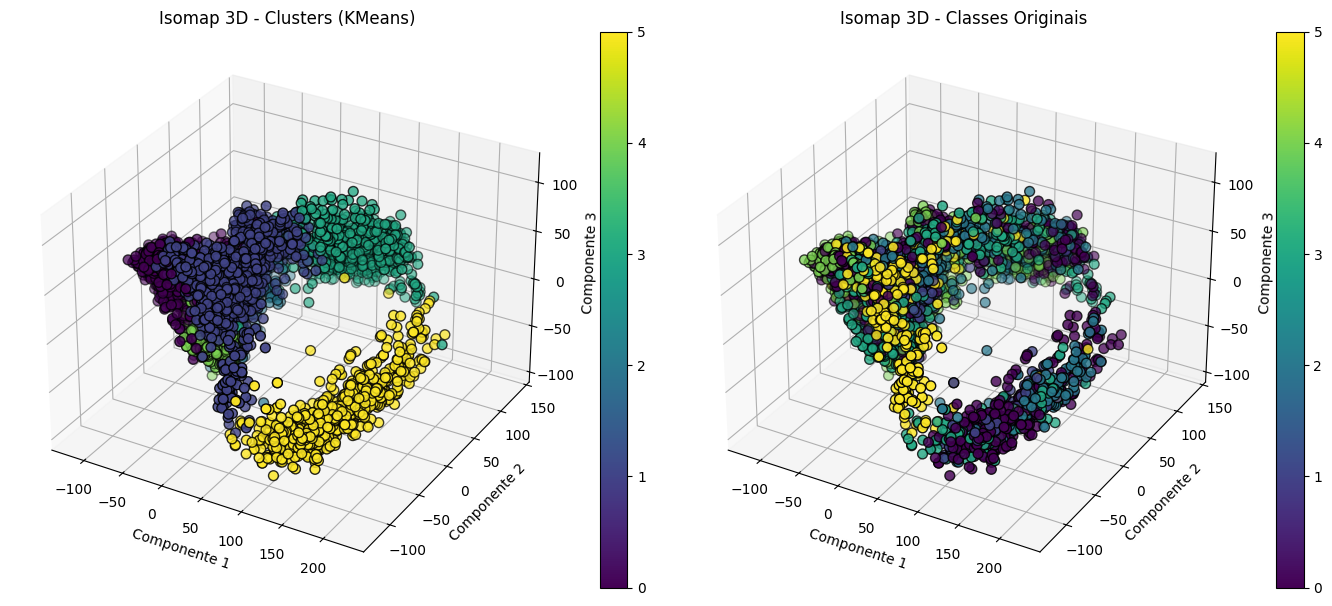

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from mpl_toolkits.mplot3d import Axes3D  # Necessário para plotagem 3D

# ----------------------------
# Simulação do embedding e rótulos originais
# ----------------------------
# Suponha que você já possua seus embeddings e os rótulos originais, por exemplo:
# embeddings = np.load("seus_embeddings.npy")
# labels_originais = np.load("seus_labels.npy")

# Simulação: criamos rótulos originais para 6 classes
labels_originais = labels

# ----------------------------
# Redução dimensional utilizando Isomap para 3 dimensões
# ----------------------------
n_neighbors = 15  # número de vizinhos para o Isomap, ajuste conforme necessário
n_components = 3  # reduzindo para 3 dimensões para visualização 3D
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
embeddings_3d = isomap.fit_transform(embeddings)

# ----------------------------
# Clusterização utilizando KMeans com 6 clusters
# ----------------------------
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# ----------------------------
# Cálculo de métricas: ARI e NMI
# ----------------------------
ari = adjusted_rand_score(labels_originais, clusters)
nmi = normalized_mutual_info_score(labels_originais, clusters)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

# ----------------------------
# Plotagem dos Gráficos 3D de Comparação
# ----------------------------
fig = plt.figure(figsize=(14, 6))

# Gráfico 1: Embeddings após Isomap em 3D, coloridos com base nos clusters obtidos via KMeans
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(
    embeddings_3d[:, 0],
    embeddings_3d[:, 1],
    embeddings_3d[:, 2],
    c=clusters,
    cmap="viridis",
    edgecolor="k",
    s=50
)
ax1.set_title("Isomap 3D - Clusters (KMeans)")
ax1.set_xlabel("Componente 1")
ax1.set_ylabel("Componente 2")
ax1.set_zlabel("Componente 3")
fig.colorbar(scatter1, ax=ax1, ticks=range(n_clusters))

# Gráfico 2: Embeddings após Isomap em 3D, com cores de acordo com as classes originais
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(
    embeddings_3d[:, 0],
    embeddings_3d[:, 1],
    embeddings_3d[:, 2],
    c=labels_originais,
    cmap="viridis",
    edgecolor="k",
    s=50
)
ax2.set_title("Isomap 3D - Classes Originais")
ax2.set_xlabel("Componente 1")
ax2.set_ylabel("Componente 2")
ax2.set_zlabel("Componente 3")
fig.colorbar(scatter2, ax=ax2, ticks=range(len(np.unique(labels_originais))))

plt.tight_layout()
plt.show()


Adjusted Rand Index (ARI): 0.0610
Normalized Mutual Information (NMI): 0.1156


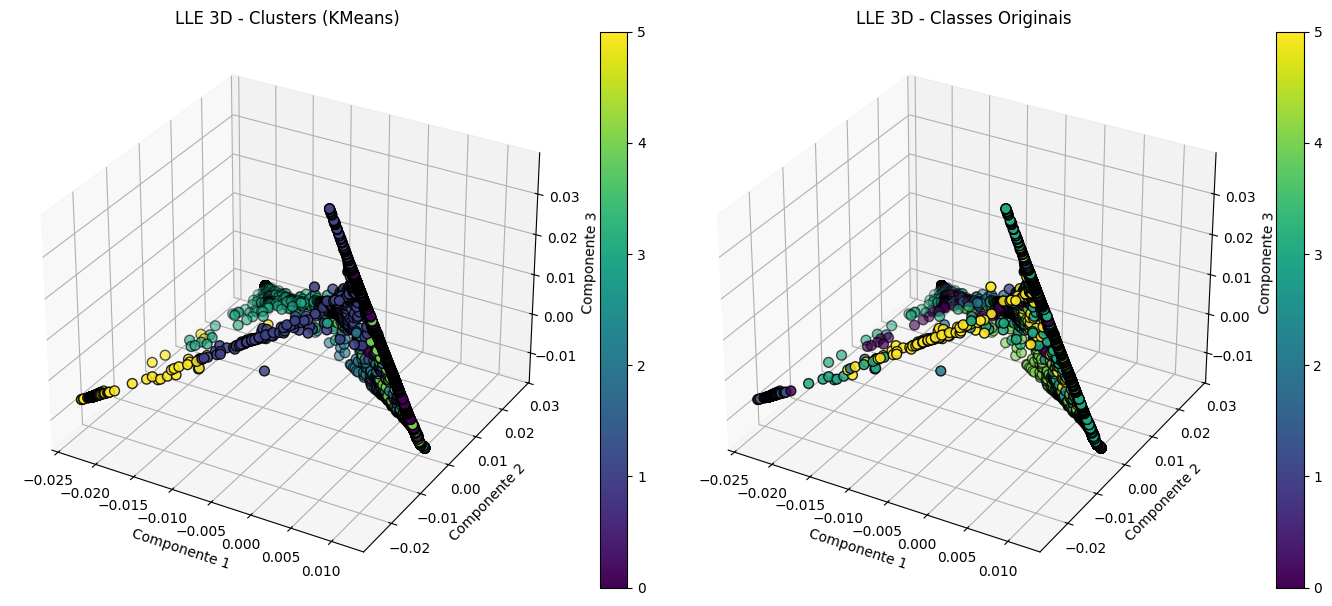

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from mpl_toolkits.mplot3d import Axes3D  # Necessário para plotagem 3D

# ----------------------------
# Simulação do embedding e rótulos originais
# ----------------------------
# Suponha que você já possua seus embeddings e os rótulos originais,
# por exemplo:
# embeddings = np.load("seus_embeddings.npy")
# labels_originais = np.load("seus_labels.npy")

# Simulação: criamos rótulos originais para 6 classes
labels_originais = labels

# ----------------------------
# Redução dimensional utilizando LLE para 3 dimensões
# ----------------------------
n_neighbors = 15  # número de vizinhos para o LLE
n_components = 3  # reduzindo para 3 dimensões para visualização 3D
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='standard')
embeddings_3d = lle.fit_transform(embeddings)

# ----------------------------
# Clusterização utilizando KMeans com 6 clusters
# ----------------------------
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings)

# ----------------------------
# Cálculo de métricas: ARI e NMI
# ----------------------------
ari = adjusted_rand_score(labels_originais, clusters)
nmi = normalized_mutual_info_score(labels_originais, clusters)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

# ----------------------------
# Plotagem dos Gráficos 3D de Comparação
# ----------------------------
fig = plt.figure(figsize=(14, 6))

# Gráfico 1: Embeddings após LLE em 3D, coloridos com base nos clusters obtidos via KMeans
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(
    embeddings_3d[:, 0],
    embeddings_3d[:, 1],
    embeddings_3d[:, 2],
    c=clusters,
    cmap="viridis",
    edgecolor="k",
    s=50
)
ax1.set_title("LLE 3D - Clusters (KMeans)")
ax1.set_xlabel("Componente 1")
ax1.set_ylabel("Componente 2")
ax1.set_zlabel("Componente 3")
fig.colorbar(scatter1, ax=ax1, ticks=range(n_clusters))

# Gráfico 2: Embeddings após LLE em 3D, com cores de acordo com as classes originais
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(
    embeddings_3d[:, 0],
    embeddings_3d[:, 1],
    embeddings_3d[:, 2],
    c=labels_originais,
    cmap="viridis",
    edgecolor="k",
    s=50
)
ax2.set_title("LLE 3D - Classes Originais")
ax2.set_xlabel("Componente 1")
ax2.set_ylabel("Componente 2")
ax2.set_zlabel("Componente 3")
fig.colorbar(scatter2, ax=ax2, ticks=range(len(np.unique(labels_originais))))

plt.tight_layout()
plt.show()


In [58]:
!pip install minisom # install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=6037ed168ae721bf77884984278c49f082613a433b507638db28ef20a09e3af5
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


Adjusted Rand Index (ARI): 0.0000
Normalized Mutual Information (NMI): 0.0000


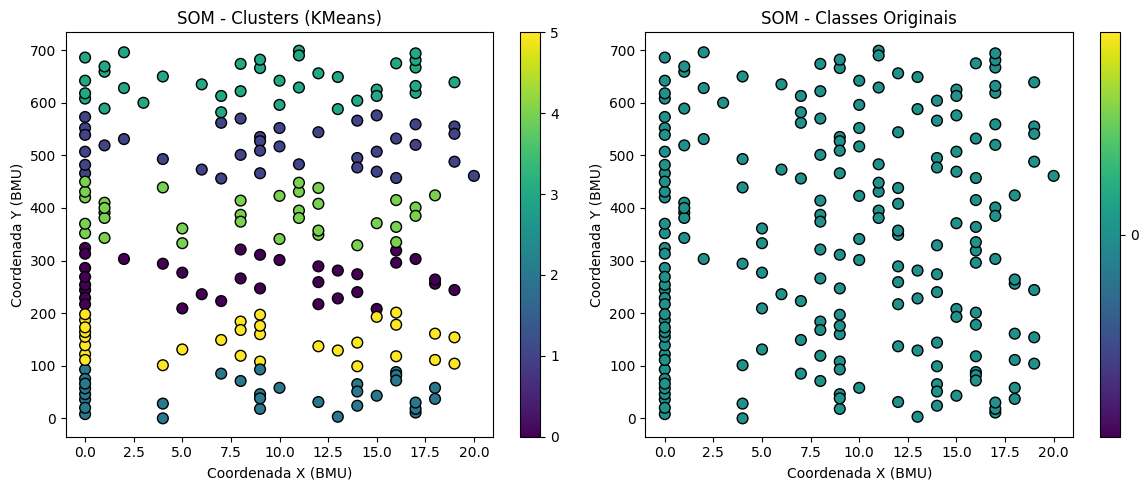

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# ----------------------------
# Simulação dos dados (embeddings) e rótulos originais
# ----------------------------
# Se você já possuir seus dados, substitua as variáveis abaixo, por exemplo:
# embeddings = np.load("seus_embeddings.npy")
# labels_originais = np.load("seus_labels.npy")

# Assuming 'labels' contains the original labels for all 7582 samples
labels_originais = labels

# ----------------------------
# Treinamento do SOM
# ----------------------------
# Definindo o tamanho do mapa. Aqui, usamos uma grade 10x10 (pode ser ajustado conforme os dados)
som_x, som_y = 100, 700
input_len = embeddings.shape[1]
som = MiniSom(som_x, som_y, input_len, sigma=1.0, learning_rate=0.5)
som.random_weights_init(embeddings)
som.train_random(embeddings, 1000)  # 1000 iterações

# Para cada amostra, obtém a BMU (coordenadas no mapa SOM)
bmu_coordinates = np.array([som.winner(x) for x in embeddings])
# bmu_coordinates tem shape (n_samples, 2), com as coordenadas (i, j)

# ----------------------------
# Clusterização utilizando KMeans com 6 clusters, sobre as BMU dos dados
# ----------------------------
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(bmu_coordinates)

# ----------------------------
# Cálculo das métricas: ARI e NMI
# ----------------------------
# Selecting the original labels corresponding to the 200 embeddings used for clustering
labels_for_clustering = labels_originais[:len(embeddings)] # Selecting the first 200 labels

ari = adjusted_rand_score(labels_for_clustering, clusters) # Using the selected labels
nmi = normalized_mutual_info_score(labels_for_clustering, clusters)  # Using the selected labels

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

# ----------------------------
# Plotagem dos gráficos de comparação (2D)
# ----------------------------
plt.figure(figsize=(12, 5))

# Gráfico 1: Posições BMU coloridas de acordo com os clusters obtidos via KMeans
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(bmu_coordinates[:, 0], bmu_coordinates[:, 1], c=clusters,
                        cmap="viridis", edgecolor="k", s=60)
plt.title("SOM - Clusters (KMeans)")
plt.xlabel("Coordenada X (BMU)")
plt.ylabel("Coordenada Y (BMU)")
plt.colorbar(scatter1, ticks=range(n_clusters))

# Gráfico 2: Posições BMU coloridas conforme as classes originais
plt.subplot(1, 2, 2)
unique_labels = np.unique(labels_for_clustering) # Using selected labels
scatter2 = plt.scatter(bmu_coordinates[:, 0], bmu_coordinates[:, 1], c=labels_for_clustering, # Using selected labels
                        cmap="viridis", edgecolor="k", s=60)
plt.title("SOM - Classes Originais")
plt.xlabel("Coordenada X (BMU)")
plt.ylabel("Coordenada Y (BMU)")
plt.colorbar(scatter2, ticks=range(len(unique_labels)))

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from mpl_toolkits.mplot3d import Axes3D  # Para visualização 3D


labels_originais = labels

# ----------------------------
# Redução dimensional com MDS para 3 dimensões
# ----------------------------
mds = MDS(n_components=3, random_state=42, dissimilarity='euclidean', n_init=4, max_iter=300)
embeddings_3d = mds.fit_transform(embeddings)

# ----------------------------
# Clusterização com KMeans sobre os embeddings reduzidos pelo MDS
# ----------------------------
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(embeddings_3d) # Changed line: Clustering on reduced data


# ----------------------------
# Métricas de avaliação
# ----------------------------
ari = adjusted_rand_score(labels_originais[:len(embeddings_3d)], clusters) # Comparing labels with cluster assignments
nmi = normalized_mutual_info_score(labels_originais[:len(embeddings_3d)], clusters)

print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

# ----------------------------
# Visualização 3D
# ----------------------------
fig = plt.figure(figsize=(14, 6))

# Gráfico 1: cores conforme clusters
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(
    embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2],
    c=clusters, cmap='viridis', edgecolor='k', s=50
)
ax1.set_title("MDS 3D - Clusters (KMeans)")
ax1.set_xlabel("Dimensão 1")
ax1.set_ylabel("Dimensão 2")
ax1.set_zlabel("Dimensão 3")
fig.colorbar(scatter1, ax=ax1, ticks=range(n_clusters))

# Gráfico 2: cores conforme classes reais
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(
    embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2],
    c=labels_originais[:len(embeddings_3d)], cmap='viridis', edgecolor='k', s=50 # Using corresponding labels
)
ax2.set_title("MDS 3D - Classes Originais")
ax2.set_xlabel("Dimensão 1")
ax2.set_ylabel("Dimensão 2")
ax2.set_zlabel("Dimensão 3")
fig.colorbar(scatter2, ax=ax2, ticks=range(len(np.unique(labels_originais))))

plt.tight_layout()
plt.show()


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from mpl_toolkits.mplot3d import Axes3D  # Necessário para plotagem 3D


labels_originais = labels

# ----------------------------
# Redução dimensional utilizando Kernel PCA para 3 dimensões
# ----------------------------
# Configuramos o KernelPCA com um kernel 'rbf'.
# O parâmetro gamma controla a largura do kernel (ajuste conforme necessário).
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.1)
embeddings_3d = kpca.fit_transform(embeddings)

# ----------------------------
# Clusterização utilizando KMeans com 6 clusters sobre os embeddings originais
# ----------------------------
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# clusters = kmeans.fit_predict(embeddings)  # Original line causing the error
clusters = kmeans.fit_predict(embeddings_3d) # Changed line: Clustering on reduced data

# ----------------------------
# Cálculo das métricas: ARI e NMI
# ----------------------------
# Selecting original labels corresponding to the clustered embeddings
labels_for_clustering = labels_originais[:len(embeddings_3d)]
ari = adjusted_rand_score(labels_for_clustering, clusters)
nmi = normalized_mutual_info_score(labels_for_clustering, clusters)


print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

# ----------------------------
# Plotagem dos gráficos 3D de comparação
# ----------------------------
fig = plt.figure(figsize=(14, 6))

# Gráfico 1: Embeddings após Kernel PCA (3D), com cores dos clusters gerados via KMeans
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(
    embeddings_3d[:, 0],
    embeddings_3d[:, 1],
    embeddings_3d[:, 2],
    c=clusters,
    cmap="viridis",
    edgecolor="k",
    s=50
)
ax1.set_title("Kernel PCA 3D - Clusters (KMeans)")
ax1.set_xlabel("Componente 1")
ax1.set_ylabel("Componente 2")
ax1.set_zlabel("Componente 3")
fig.colorbar(scatter1, ax=ax1, ticks=range(n_clusters))

# Gráfico 2: Embeddings após Kernel PCA (3D), com cores conforme as classes originais
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(
    embeddings_3d[:, 0],
    embeddings_3d[:, 1],
    embeddings_3d[:, 2],
    c=labels_for_clustering, # Using selected labels
    cmap="viridis",
    edgecolor="k",
    s=50
)
ax2.set_title("Kernel PCA 3D - Classes Originais")
ax2.set_xlabel("Componente 1")
ax2.set_ylabel("Componente 2")
ax2.set_zlabel("Componente 3")
fig.colorbar(scatter2, ax=ax2, ticks=range(len(np.unique(labels_originais))))

plt.tight_layout()
plt.show()

KeyboardInterrupt: 